# Git in DataFrames

python + git + dataframe = [git-pandas](http://wdm0006.github.io/git-pandas/)

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Repository

In [ ]:
from gitpandas import Repository
tries = ["../..", "../../.."]
err = None
for t in tries:
    try:
        repo = Repository(working_dir=t, verbose=True)
        err = None
        break
    except Exception as e:
        err = e
        continue
if err is not None:
    import os
    raise Exception("issue in current folder '{0}'".format(os.getcwd())) from err

Repository [pyquickhelper] instantiated at directory: ../..


In [ ]:
repo.branches()

,branch,local,repository
0,master,True,pyquickhelper
1,master,False,pyquickhelper


One funny function. No idea if that gives a good estimation.

In [ ]:
try:
    use = repo.hours_estimate()
except Exception as e:
    # Not always reliable.
    print(e)
    use = None
use

c:\Python36_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,committer,hours
0,ped4747,0.000000
1,azure provisioned user,2.483333
2,xavier dupré,238.348889
3,dupre,515.906667
4,sdpython,107.178611


In [ ]:
if use is not None:
    workdays = use.hours.sum() / 8
else:
    workdays = None
workdays

107.98968749999999

I might be very slow then :) becauase I think I spend more time than that.

## Logs

The following cane take some time depending on you repository size.

In [ ]:
try:
    hist = repo.commit_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    hist = pandas.DataFrame()
hist.head()

c:\Python36_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,lines,insertions,deletions,net
date,,,,,,,
2017-08-29 11:46:51,xavier dupré,xavier dupré,"changes the display of the coverage, improve a...",20,14,6,8
2017-08-29 01:22:39,xavier dupré,xavier dupré,fix a bug about cached urls in notebooks\n,4,3,1,2
2017-08-29 00:51:31,xavier dupré,xavier dupré,documentation\n,36,18,18,0
2017-08-27 23:17:20,xavier dupré,xavier dupré,fix a bug for #67\n,10,6,4,2
2017-08-27 22:49:38,xavier dupré,xavier dupré,fix a bug for #67\n,19,12,7,5


In [ ]:
try:
    histf = repo.file_change_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    histf = pandas.DataFrame(dict(filename=[""]))
histf.head()

c:\Python36_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2017-08-29 11:46:51,xavier dupré,xavier dupré,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,_doc/notebooks/git_dataframes.ipynb,10,2
2017-08-29 11:46:51,xavier dupré,xavier dupré,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,src/pyquickhelper/helpgen/process_notebooks.py,4,4
2017-08-29 01:22:39,xavier dupré,xavier dupré,fix a bug about cached urls in notebooks\n,3ffde70e558bf1792ea6760a8225052b06f4e041,src/pyquickhelper/ipythonhelper/run_notebook.py,3,1
2017-08-29 00:51:31,xavier dupré,xavier dupré,documentation\n,951bc20e1d4aef000aea821245736bb1507313da,src/pyquickhelper/ipythonhelper/html_forms.py,18,18
2017-08-27 23:17:20,xavier dupré,xavier dupré,fix a bug for #67\n,047dafa61db9dc5b7ec815a3d5e1b4f7c0679659,_unittests/ut_sphinxext/test_blog_helper.py,3,1


In [ ]:
histf.tail()

,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/file_tree_node.py,399,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/synchelper.py,256,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/__init__.py,0,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/utils_tests.py,280,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/version.txt,1,0


## Check removed files

In [ ]:
unique = set(histf.filename)
len(unique)

766

In [ ]:
import os
sorted_unique = list(sorted(unique))
full_path = [os.path.join(repo.repo.working_dir, _) for _ in sorted_unique]

In [ ]:
import numpy
exists = [os.path.exists(f) for f in full_path]
sizes = [os.stat(f).st_size if os.path.exists(f) else numpy.nan for f in full_path]

In [ ]:
import pandas
removed = pandas.DataFrame(dict(name=sorted_unique, exists=exists, size=sizes))
removed.sort_values("size").dropna().tail()

,exists,name,size
248,True,_unittests/ut_helpgen/notebooks_js/js_plotly.i...,222223.0
240,True,_unittests/ut_helpgen/notebooks/td1a_cenonce_s...,258184.0
141,True,_doc/sphinxdoc/source/tutorial/images/automati...,328121.0
61,True,_doc/sphinxdoc/source/automation.jpg,328121.0
256,True,_unittests/ut_helpgen/notebooks_svg/seance4_pr...,399746.0


How many files not exist anymore?

In [ ]:
removed[~removed.exists].shape

(148, 3)

In [ ]:
removed[~removed.exists].head()

,exists,name,size
0,False,"""_unittests/ut_sync/data/bug/bugged/Pr\303\251...",NaN
1,False,.circle.yml,NaN
2,False,.circle.yml => circle.yml,NaN
4,False,.coveragerc,NaN
5,False,.coveralls.yml,NaN


In [ ]:
g = repo.repo.git()

In [ ]:
print(g.execute('git log --log-size --abbrev --follow "build_script.bat"'))

commit eba47ba0e8fb6cd7b10f62628a6ae71731b7418f
log size 105
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Sat Mar 11 22:24:45 2017 +0100

    update python

commit 0ca2465e8c2f68762442df1920fbc6300ef09a60
log size 102
Author: dupre <xavier.dupre@ensae.fr>
Date:   Mon Apr 25 21:18:18 2016 +0200

    update build_script

commit d0dd08cdd12995b4a3e2423b8434bbfcd38d4e66
log size 120
Author: dupre <xavier.dupre@ensae.fr>
Date:   Fri Sep 18 00:50:44 2015 +0200

    revert to python 3.4 build_script.bat

commit 0e2306bf7fc99dc15c6f6d0f8a2abeb74bb6b893
log size 137
Author: dupre <xavier.dupre@ensae.fr>
Date:   Thu Sep 17 22:05:00 2015 +0200

    update to deal with Python 3.5, minimizes dependencies

commit 9e6fd6acd73670a3b2aa4098f33f015f5c1ae8a7
log size 155
Author: dupre <xavier.dupre@ensae.fr>
Date:   Sun May 3 12:49:38 2015 +0200

    add the script automation to the module, it automatically creates scripts


In [ ]:
from pyquickhelper.loghelper.repositories.pygit_helper import get_repo_log
res = get_repo_log(repo.repo.working_dir)
res[0]

['xavier dupré',
 'c8b1e26a',
 datetime.datetime(2017, 8, 29, 0, 0),
 'changes the display of the coverage, improve a notebook on git',
 'c8b1e26ac625744df236cd5377f1c62f802e2e1a',
 'https://github.com/sdpython/pyquickhelper/commit/c8b1e26ac625744df236cd5377f1c62f802e2e1a']

In [ ]:
df = pandas.DataFrame(data=res, columns="owner hash datetime comment full_hash path".split())
df.head()

,owner,hash,datetime,comment,full_hash,path
0,xavier dupré,c8b1e26a,2017-08-29,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,https://github.com/sdpython/pyquickhelper/comm...
1,xavier dupré,3ffde70e,2017-08-29,fix a bug about cached urls in notebooks,3ffde70e558bf1792ea6760a8225052b06f4e041,https://github.com/sdpython/pyquickhelper/comm...
2,xavier dupré,951bc20e,2017-08-29,documentation,951bc20e1d4aef000aea821245736bb1507313da,https://github.com/sdpython/pyquickhelper/comm...
3,xavier dupré,047dafa6,2017-08-27,fix a bug for #67,047dafa61db9dc5b7ec815a3d5e1b4f7c0679659,https://github.com/sdpython/pyquickhelper/comm...
4,xavier dupré,1cd201bf,2017-08-27,fix a bug for #67,1cd201bfa980c610662623ebe496d3b40f60afef,https://github.com/sdpython/pyquickhelper/comm...


In [ ]:
res = get_repo_log(repo.repo.working_dir, file_detail=True)
res[0]

('xavier dupré',
 'c8b1e26a',
 datetime.datetime(2017, 8, 29, 0, 0),
 'changes the display of the coverage, improve a notebook on git',
 'c8b1e26ac625744df236cd5377f1c62f802e2e1a',
 'https://github.com/sdpython/pyquickhelper/commit/c8b1e26ac625744df236cd5377f1c62f802e2e1a',
 '_doc/notebooks/git_dataframes.ipynb',
 12,
 0)

In [ ]:
df = pandas.DataFrame(data=res, columns="owner hash datetime comment full_hash path name net bytes".split())
df.head()

,owner,hash,datetime,comment,full_hash,path,name,net,bytes
0,xavier dupré,c8b1e26a,2017-08-29,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,https://github.com/sdpython/pyquickhelper/comm...,_doc/notebooks/git_dataframes.ipynb,12,0
1,xavier dupré,c8b1e26a,2017-08-29,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/helpgen/process_notebooks.py,8,0
2,xavier dupré,3ffde70e,2017-08-29,fix a bug about cached urls in notebooks,3ffde70e558bf1792ea6760a8225052b06f4e041,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/ipythonhelper/run_notebook.py,4,0
3,xavier dupré,951bc20e,2017-08-29,documentation,951bc20e1d4aef000aea821245736bb1507313da,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/ipythonhelper/html_forms.py,36,0
4,xavier dupré,047dafa6,2017-08-27,fix a bug for #67,047dafa61db9dc5b7ec815a3d5e1b4f7c0679659,https://github.com/sdpython/pyquickhelper/comm...,_unittests/ut_sphinxext/test_blog_helper.py,4,0


In [ ]:
df["ext"] = df.name.apply(lambda x: os.path.splitext(x)[-1].strip())
df.head(n=2)

,owner,hash,datetime,comment,full_hash,path,name,net,bytes,ext
0,xavier dupré,c8b1e26a,2017-08-29,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,https://github.com/sdpython/pyquickhelper/comm...,_doc/notebooks/git_dataframes.ipynb,12,0,.ipynb
1,xavier dupré,c8b1e26a,2017-08-29,"changes the display of the coverage, improve a...",c8b1e26ac625744df236cd5377f1c62f802e2e1a,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/helpgen/process_notebooks.py,8,0,.py


In [ ]:
gr = df[df.ext.isin((".py", ".ipynb", ".txt", ".zip", ".yml"))].groupby("ext").sum()
gr.T

ext,.ipynb,.py,.txt,.yml,.zip
net,57213,139884,2184,951,0
bytes,0,0,0,0,59688


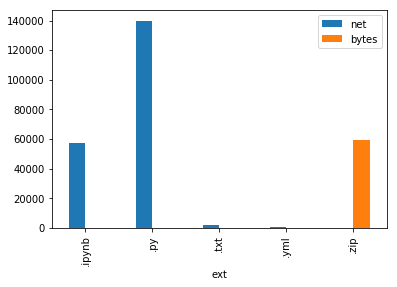

In [ ]:
gr.plot(kind="bar")